<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-pre-processing-for-MEG-and-EEG-T-maze-data" data-toc-modified-id="Example-pre-processing-for-MEG-and-EEG-T-maze-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example pre-processing for MEG and EEG T-maze data</a></span><ul class="toc-item"><li><span><a href="#Import-all-libraries" data-toc-modified-id="Import-all-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import all libraries</a></span></li><li><span><a href="#Load-the-data-and-concatenate-the-raw-files" data-toc-modified-id="Load-the-data-and-concatenate-the-raw-files-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the data and concatenate the raw files</a></span></li><li><span><a href="#Review-basic-raw-file-properties" data-toc-modified-id="Review-basic-raw-file-properties-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Review basic raw file properties</a></span></li><li><span><a href="#Event-structure" data-toc-modified-id="Event-structure-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Event structure</a></span></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Pre-processing</a></span><ul class="toc-item"><li><span><a href="#Review-artifacts" data-toc-modified-id="Review-artifacts-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Review artifacts</a></span></li><li><span><a href="#Filtering-and-ICA" data-toc-modified-id="Filtering-and-ICA-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Filtering and ICA</a></span></li><li><span><a href="#Automatic-artifact-component-detection" data-toc-modified-id="Automatic-artifact-component-detection-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Automatic artifact component detection</a></span></li></ul></li><li><span><a href="#Referencing-and-segmentation" data-toc-modified-id="Referencing-and-segmentation-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Referencing and segmentation</a></span></li><li><span><a href="#Save-raw-and-epochs-files" data-toc-modified-id="Save-raw-and-epochs-files-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Save raw and epochs files</a></span></li></ul></li><li><span><a href="#Segmentation-and-averaged-ERPs" data-toc-modified-id="Segmentation-and-averaged-ERPs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Segmentation and averaged ERPs</a></span><ul class="toc-item"><li><span><a href="#Plotting-topographies" data-toc-modified-id="Plotting-topographies-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plotting topographies</a></span></li><li><span><a href="#Plotting-channels" data-toc-modified-id="Plotting-channels-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plotting channels</a></span></li></ul></li><li><span><a href="#Adding-64-channel-data" data-toc-modified-id="Adding-64-channel-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Adding 64-channel data</a></span><ul class="toc-item"><li><span><a href="#64-channels:-Pre-processing" data-toc-modified-id="64-channels:-Pre-processing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>64 channels: Pre-processing</a></span></li><li><span><a href="#64-channels:-Segmentation-and-averaged-ERPs" data-toc-modified-id="64-channels:-Segmentation-and-averaged-ERPs-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>64 channels: Segmentation and averaged ERPs</a></span></li><li><span><a href="#64-channels:-Plotting-topographies" data-toc-modified-id="64-channels:-Plotting-topographies-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>64 channels: Plotting topographies</a></span></li><li><span><a href="#64-channels:-Plotting-channels" data-toc-modified-id="64-channels:-Plotting-channels-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>64 channels: Plotting channels</a></span></li><li><span><a href="#64-channels:-save-raw-and-epochs-files" data-toc-modified-id="64-channels:-save-raw-and-epochs-files-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>64 channels: save raw and epochs files</a></span></li></ul></li><li><span><a href="#Export-data-for-time-frequency-analysis" data-toc-modified-id="Export-data-for-time-frequency-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Export data for time frequency analysis</a></span></li><li><span><a href="#Time-frequency-results" data-toc-modified-id="Time-frequency-results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Time frequency results</a></span></li></ul></div>

# Hypothesis 3

There are effects of successful recognition of old images (i.e., a difference between
old images correctly recognized as old [hits] vs. old images incorrectly judged as new
[misses]) ...

a. ... on EEG voltage at any channels, at any time.

b. ... on spectral power, at any frequencies, at any channels, at any time.

## Hypothesis 3a

### Import all libraries

In [1]:
# MNE-python
import mne
from mne.time_frequency import tfr_morlet, read_tfrs
from mne.stats import combine_adjacency, spatio_temporal_cluster_1samp_test
from mne.channels import find_ch_adjacency, make_1020_channel_selections

# Data management
import numpy as np
import pandas as pd
import csv

# Stats
import scipy.stats

# Plotting
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# To cut out some deprecation warnings cluttering outputs
import warnings
warnings.filterwarnings('ignore')

### Plot the grand average ERP with a difference wave

In [2]:
# Change the default matplotlib font size
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
# Set the BIDS root directory
bids_root = 'F:\\manypipelines\\eeg_BIDS\\'

# Create a list of all subjects
subs = [str(item).zfill(3) for item in np.arange(1,34)]

# Set the time interval to be explored (pre-window 200 ms, 500 ms image presentation,
# variable black screen reaction time window)
tmin, tmax = -.2, .8

In [4]:
# Preallocate lists for collecting subject averages
list_hits = []
list_misses = []

for subject in subs:
    
    hitsPath = bids_root + 'evoked\\sub-' + subject + '-hits-ave.fif'
    hits = mne.read_evokeds(hitsPath)[0].crop(tmin=tmin, tmax=tmax)
    missesPath = bids_root + 'evoked\\sub-' + subject + '-misses-ave.fif'
    misses = mne.read_evokeds(missesPath)[0].crop(tmin=tmin, tmax=tmax)

    # Collect ERPs in a list for each condition
    list_hits.append(hits)
    list_misses.append(misses)

Reading F:\manypipelines\eeg_BIDS\evoked\sub-001-hits-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.01 × manmade-old-hit-subfor + 0.21 × manmade-old-hit-subrem + 0.25 × manmade-old-hit-na + 0.01 × natural-old-hit-subfor + 0.24 × natural-old-hit-subrem + 0.28 × natural-old-hit-na)
        0 CTF compensation matrices available
        nave = 531 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-001-misses-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.02 × manmade-old-miss-subfor + 0.30 × manmade-old-miss-subrem + 0.09 × manmade-old-miss-na + 0.08 × natural-old-miss-subfor + 0.30 × natural-old-miss-subrem + 0.21 × natural-old-miss-na)
        0 CTF compensation matrices available
        nave = 53 - aspect type = 100
No projector specified for 

        nave = 429 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-008-misses-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.07 × manmade-old-miss-subfor + 0.24 × manmade-old-miss-subrem + 0.20 × manmade-old-miss-na + 0.11 × natural-old-miss-subfor + 0.18 × natural-old-miss-subrem + 0.21 × natural-old-miss-na)
        0 CTF compensation matrices available
        nave = 150 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-009-hits-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.03 × manmade-old-hit-subfor + 0.19 × manmade-old-hit-subrem + 0.26 × manmade-old-hit-na + 0.03 × natura

        0 CTF compensation matrices available
        nave = 57 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-016-hits-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.03 × manmade-old-hit-subfor + 0.22 × manmade-old-hit-subrem + 0.28 × manmade-old-hit-na + 0.03 × natural-old-hit-subfor + 0.18 × natural-old-hit-subrem + 0.26 × natural-old-hit-na)
        0 CTF compensation matrices available
        nave = 408 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-016-misses-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.07 × manmade-old-miss-subfor + 0.21 × manmade-old-miss-subrem + 

        t =    -199.22 ...    1000.00 ms (0.01 × manmade-old-hit-subfor + 0.21 × manmade-old-hit-subrem + 0.26 × manmade-old-hit-na + 0.01 × natural-old-hit-subfor + 0.23 × natural-old-hit-subrem + 0.28 × natural-old-hit-na)
        0 CTF compensation matrices available
        nave = 505 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-023-misses-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.02 × manmade-old-miss-subfor + 0.29 × manmade-old-miss-subrem + 0.11 × manmade-old-miss-na + 0.04 × natural-old-miss-subfor + 0.35 × natural-old-miss-subrem + 0.20 × natural-old-miss-na)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (

Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-030-misses-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.04 × manmade-old-miss-subfor + 0.30 × manmade-old-miss-subrem + 0.09 × manmade-old-miss-na + 0.08 × natural-old-miss-subfor + 0.34 × natural-old-miss-subrem + 0.16 × natural-old-miss-na)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-031-hits-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.10 × manmade-old-hit-subfor + 0.13 × manmade-old-hit-subrem + 0.27 × manmade-old-hit-na + 0.11 × natural-old-hit-subfor + 0.13 × natural-old-hit-subrem + 0.27 × natural-old-hit-na)
        0 CTF compensation matrices available

Identifying common channels ...
Identifying common channels ...
No projector specified for this dataset. Please consider the method self.add_proj.


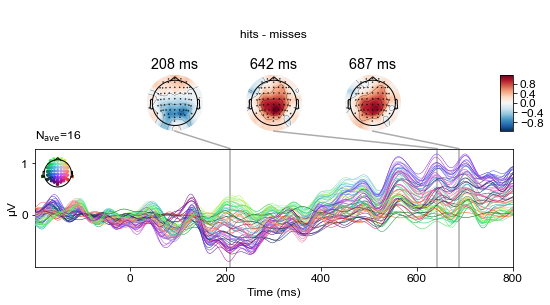

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


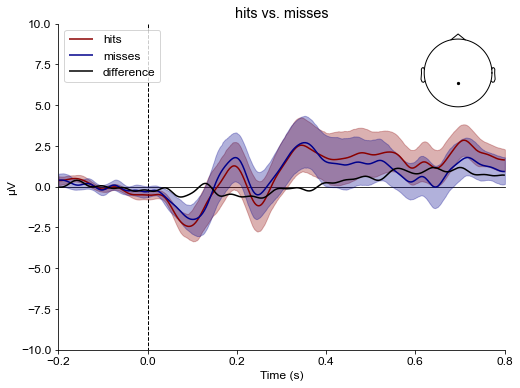

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


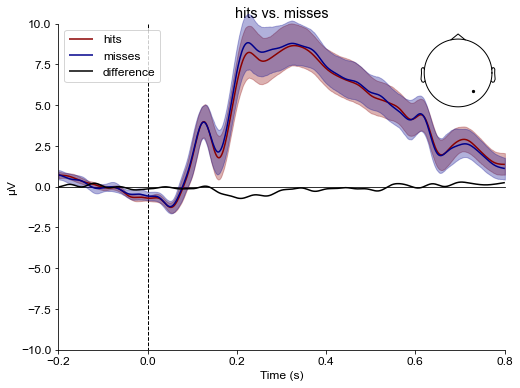

In [5]:
# Calculate their difference wave
hits = mne.grand_average(list_hits)
misses = mne.grand_average(list_misses)
diff = mne.combine_evoked([hits, misses], weights=[1, -1])

# Set some plotting parameters
time_unit = dict(time_unit="ms")
diff.plot_joint(title="hits - misses", ts_args=time_unit,
                  topomap_args=time_unit);

ylim = dict(eeg=[-10, 10])
colors = dict(hits = 'darkred', misses = 'darkblue', difference = 'black')
ERPs = {'hits': list_hits, 'misses': list_misses, 'difference': diff}
linestyles = dict(hits = '-', misses = '-', difference = '-')

mne.viz.plot_compare_evokeds(ERPs, picks=['Pz'], combine='mean',
                             truncate_yaxis=False, truncate_xaxis=False,
                             colors=colors, linestyles=linestyles,
                             invert_y=False, ylim = ylim,
                             title='hits vs. misses', ci=.95,
                             show_sensors=True);
mne.viz.plot_compare_evokeds(ERPs, picks=['PO8'], combine='mean',
                             truncate_yaxis=False, truncate_xaxis=False,
                             colors=colors, linestyles=linestyles,
                             invert_y=False, ylim = ylim,
                             title='hits vs. misses', ci=.95,
                             show_sensors=True);

Descriptively speaking, there are some differences between conditions here. The best chance would be to look where the amplitude of the difference is the largest and at the time that this difference peaks. That would be between 200 and 300 ms at medial central to parietooccpital locations.

The next analysis will use a non-parametric cluster-level test for spatio-temporal data. This will reveal that when tested  rigorously throughout multiple permutations which clusters of sensors through space (channels) and time (samples) hold a significant difference between conditions.

### Collect the single subject ERP data

In [6]:
# Create a list of strings with all subject IDs
subs = [str(item).zfill(3) for item in np.arange(1,34)]

subNr = len(subs)
chNr = 66
samples = np.int((np.abs(tmin) + np.abs(tmax)) * 512) + 1

# Set the BIDS root directory
bids_root = 'F:\\manypipelines\\eeg_BIDS\\'

# Preallocate an empty array to collect individual subject ERP data on hits and misses
hits=np.zeros(shape=(subNr, samples, chNr))
misses=np.zeros(shape=(subNr, samples, chNr))

# Initialize a subject counter
s = 0

In [7]:
# Initiate a loop over all subjects
for subject in subs:

    # Create the path to the current subject's ERP
    hitsPath = bids_root + 'evoked\\sub-' + subject + '-hits-ave.fif'
    # Load the file, drop the EOG channels, and crop the segments to the desired length
    hitsData = mne.read_evokeds(hitsPath)[0].crop(tmin=tmin, tmax=tmax).get_data()

    # Create the path to the current subject's ERP
    missesPath = bids_root + 'evoked\\sub-' + subject + '-misses-ave.fif'
    # Load the file, drop the EOG channels, and crop the segments to the desired length
    missesData = mne.read_evokeds(missesPath)[0].crop(tmin=tmin, tmax=tmax).get_data()

    # Transpose the current data so that the dimensions are channels x samples
    # and enter it into the array for hits
    hits[s, :, :] = hitsData.transpose(1, 0)
    
    # Same for misses
    misses[s, :, :] = missesData.transpose(1, 0)
    
    # Increase the subject counter
    s = s + 1

Reading F:\manypipelines\eeg_BIDS\evoked\sub-001-hits-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.01 × manmade-old-hit-subfor + 0.21 × manmade-old-hit-subrem + 0.25 × manmade-old-hit-na + 0.01 × natural-old-hit-subfor + 0.24 × natural-old-hit-subrem + 0.28 × natural-old-hit-na)
        0 CTF compensation matrices available
        nave = 531 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-001-misses-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.02 × manmade-old-miss-subfor + 0.30 × manmade-old-miss-subrem + 0.09 × manmade-old-miss-na + 0.08 × natural-old-miss-subfor + 0.30 × natural-old-miss-subrem + 0.21 × natural-old-miss-na)
        0 CTF compensation matrices available
        nave = 53 - aspect type = 100
No projector specified for 

        nave = 429 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-008-misses-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.07 × manmade-old-miss-subfor + 0.24 × manmade-old-miss-subrem + 0.20 × manmade-old-miss-na + 0.11 × natural-old-miss-subfor + 0.18 × natural-old-miss-subrem + 0.21 × natural-old-miss-na)
        0 CTF compensation matrices available
        nave = 150 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-009-hits-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.03 × manmade-old-hit-subfor + 0.19 × manmade-old-hit-subrem + 0.26 × manmade-old-hit-na + 0.03 × natura

        0 CTF compensation matrices available
        nave = 57 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-016-hits-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.03 × manmade-old-hit-subfor + 0.22 × manmade-old-hit-subrem + 0.28 × manmade-old-hit-na + 0.03 × natural-old-hit-subfor + 0.18 × natural-old-hit-subrem + 0.26 × natural-old-hit-na)
        0 CTF compensation matrices available
        nave = 408 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-016-misses-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.07 × manmade-old-miss-subfor + 0.21 × manmade-old-miss-subrem + 

        t =    -199.22 ...    1000.00 ms (0.01 × manmade-old-hit-subfor + 0.21 × manmade-old-hit-subrem + 0.26 × manmade-old-hit-na + 0.01 × natural-old-hit-subfor + 0.23 × natural-old-hit-subrem + 0.28 × natural-old-hit-na)
        0 CTF compensation matrices available
        nave = 505 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-023-misses-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.02 × manmade-old-miss-subfor + 0.29 × manmade-old-miss-subrem + 0.11 × manmade-old-miss-na + 0.04 × natural-old-miss-subfor + 0.35 × natural-old-miss-subrem + 0.20 × natural-old-miss-na)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (

Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-030-misses-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.04 × manmade-old-miss-subfor + 0.30 × manmade-old-miss-subrem + 0.09 × manmade-old-miss-na + 0.08 × natural-old-miss-subfor + 0.34 × natural-old-miss-subrem + 0.16 × natural-old-miss-na)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\sub-031-hits-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.10 × manmade-old-hit-subfor + 0.13 × manmade-old-hit-subrem + 0.27 × manmade-old-hit-na + 0.11 × natural-old-hit-subfor + 0.13 × natural-old-hit-subrem + 0.27 × natural-old-hit-na)
        0 CTF compensation matrices available

### Run the spatio-temporal cluster permutation

In [8]:
# Load a random ERP file to read out channel locations from
evoked = mne.read_evokeds(bids_root + 'evoked\\sub-001-hits-ave.fif')[0].crop(tmin=tmin, tmax=tmax)

# Calculate adjacency matrix between sensors from their locations to map out the spatial dependency between sensors
adjacency, _ = find_ch_adjacency(evoked.info, "eeg")

# Subtract the two conidtions from one another
testData = hits - misses

Reading F:\manypipelines\eeg_BIDS\evoked\sub-001-hits-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.01 × manmade-old-hit-subfor + 0.21 × manmade-old-hit-subrem + 0.25 × manmade-old-hit-na + 0.01 × natural-old-hit-subfor + 0.24 × natural-old-hit-subrem + 0.28 × natural-old-hit-na)
        0 CTF compensation matrices available
        nave = 531 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 66


In [9]:
# To find an appropriate threshold for significance, we calculated the t-value associated with
# a conservative threshold of p < 0.0001 (with paired t-test, two-tailed testing, and df=32)

# Set the p-value (divided by two for two-tailed testing) and degrees of freedom
q = 0.0001/2
df = 32

# Calculate the critical t-value
t_crit = scipy.stats.t.ppf(q=1-q, df=df)

In [10]:
t_crit

4.441053937083999

In [11]:
# Run the spatio-temporal cluster permutation test (1000 permutations) and calculate cluster thresholds
# Use four cores to run jobs in parallel
t_obs, clusters, cluster_pv, h0 = spatio_temporal_cluster_1samp_test(testData, threshold=t_crit,
                                                                     adjacency=adjacency, n_permutations=1000,
                                                                     n_jobs=4)

stat_fun(H1): min=-4.447488 max=4.768742
Running initial clustering
Found 4 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [12]:
# Set the family-wise threshold for cluster p-values
p_accept = 0.05

### Plot the results

In [13]:
# Read in the grand averages for both conditions
hits = mne.read_evokeds(bids_root + 'evoked\\hits-ave.fif')[0].crop(tmin=tmin, tmax=tmax)
misses = mne.read_evokeds(bids_root + 'evoked\\misses-ave.fif')[0].crop(tmin=tmin, tmax=tmax)

# Calculate their difference wave
diff = mne.combine_evoked([hits, misses], weights=[1, -1])

Reading F:\manypipelines\eeg_BIDS\evoked\hits-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (Grand average (n = 33))
        0 CTF compensation matrices available
        nave = 33 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading F:\manypipelines\eeg_BIDS\evoked\misses-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (Grand average (n = 33))
        0 CTF compensation matrices available
        nave = 33 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)


If there are significant clusters from the above analysis, the following code will plot the topography of the channel cluster and associated time course data with the corresponding time windows reliably separating conditions.

If no clusters reached signficance, this code will produce nothing.

combining channels using "mean"
combining channels using "mean"


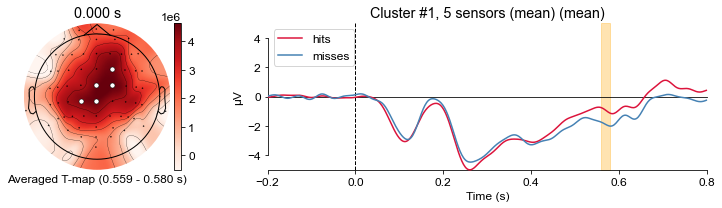

In [14]:
# Get the clusters with a p-value below 0.05
good_cluster_inds = np.where(cluster_pv < p_accept)[0]

# Set some plotting parameters
colors = {"hits": "crimson", "misses": 'steelblue'}
linestyles = {"hits": '-', "misses": '-'}
evokeds = {'hits': hits, 'misses': misses}

# Loop over significant clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)

    # get topography for F stat
    f_map = t_obs[time_inds, ...].mean(axis=0)

    # get signals at the sensors contributing to the cluster
    sig_times = hits.times[time_inds]

    # create spatial mask
    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialize figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3))

    # plot average test statistic and mark significant sensors
    f_evoked = mne.EvokedArray(f_map[:, np.newaxis], hits.info, tmin=0)
    f_evoked.plot_topomap(times=0, mask=mask, axes=ax_topo, cmap='Reds',
                          vmin=np.min, vmax=np.max, show=False,
                          colorbar=False, mask_params=dict(markersize=10))
    image = ax_topo.images[0]

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        'Averaged T-map ({:0.3f} - {:0.3f} s)'.format(*sig_times[[0, -1]]))

    # add new axis for time courses and plot time courses
    ax_signals = divider.append_axes('right', size='300%', pad=1.2)
    title = 'Cluster #{0}, {1} sensor'.format(i_clu + 1, len(ch_inds))
    if len(ch_inds) > 1:
        title += "s (mean)"
    mne.viz.plot_compare_evokeds(evokeds, title=title, picks=ch_inds, axes=ax_signals,
                                 colors=colors, linestyles=linestyles, show=False,
                                 split_legend=True, truncate_yaxis='auto', combine='mean')

    # plot temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                             color='orange', alpha=0.3)

    # clean up viz
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=.05)
    plt.show()

When using a non-parametric spatio-temporal cluster permutation test, there was a spatio-temporal cluster holding significant differences between pictures followed by hits and misses. It occurred between 559 ms and 580 ms after at 5 medial central channels. Hits produced a significantly more positive amplitude than misses at this tail end of long positive deflection lasting from 400 to 700 ms.

# Hypothesis 3b

### Collect the single subject TF data

In [17]:
# Create a list of strings with all subject IDs
subs = [str(item).zfill(3) for item in np.arange(1,34)]

subNr = len(subs)
chNr = 66
samples = 513
maxFreq = 50

# Set the BIDS root directory
bids_root = 'F:\\manypipelines\\eeg_BIDS\\'

# Preallocate an empty array to collect individual subject ERP data on hits and misses
hits=np.zeros(shape=(subNr, maxFreq, samples, chNr))
misses=np.zeros(shape=(subNr, maxFreq, samples, chNr))

# Initialize a subject counter
s = 0

In [18]:
# Initiate a loop over all subjects
for subject in subs:

    # Create the path to the current subject's ERP
    hitsPath = bids_root + 'tfr\\sub-' + subject + '-hits-tfr.h5'
    # Load the file, drop the EOG channels, and crop the segments to the desired length
    hitsData = read_tfrs(hitsPath)[0].crop(tmin=tmin, tmax=tmax).data[:,0:50,:]

    # Create the path to the current subject's ERP
    missesPath = bids_root + 'tfr\\sub-' + subject + '-misses-tfr.h5'
    # Load the file, drop the EOG channels, and crop the segments to the desired length
    missesData = read_tfrs(missesPath)[0].crop(tmin=tmin, tmax=tmax).data[:,0:50,:]

    # Transpose the current data so that the dimensions are channels x samples
    # and enter it into the array for hits
    hits[s, :, :] = hitsData.transpose(1, 2, 0)
    
    # Same for misses
    misses[s, :, :] = missesData.transpose(1, 2, 0)
    
    # Increase the subject counter
    s = s + 1

Reading F:\manypipelines\eeg_BIDS\tfr\sub-001-hits-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-001-misses-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-002-hits-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-002-misses-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-003-hits-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-003-misses-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-004-hits-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-004-misses-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-005-hits-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-005-misses-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-006-hits-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-006-misses-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-007-hits-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-007-misses-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-008-hits-tfr.h5 ...
Reading F:\manypipelines\eeg_BIDS\tfr\sub-008-misses-tfr

In [19]:
# Get the difference of the two conditions
testData = hits - misses

In [20]:
# Use the previous adjacency matrix to expand it to the time-frequency space (samples x frequencies)
adjacency_tfr = combine_adjacency(maxFreq, samples, adjacency)

In [21]:
# Run the spatio-temporal cluster permutation test (1000 permutations) and calculate cluster thresholds
# Use two cores to run jobs in parallel
t_obs, clusters, cluster_pv, h0 = spatio_temporal_cluster_1samp_test(testData, n_permutations=1000, threshold=t_crit, 
                                                                     tail=0, n_jobs=4, adjacency=adjacency_tfr)

stat_fun(H1): min=-5.099357 max=4.087300
Running initial clustering
Found 4 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [22]:
# Load the hits ERP in to extract some information for plotting
hits_ave = read_tfrs(bids_root + 'tfr\\hits-tfr.h5')[0].crop(tmin=tmin, tmax=tmax)

Reading F:\manypipelines\eeg_BIDS\tfr\hits-tfr.h5 ...


Same as for the last spatio-temporal cluster analysis, threshold the result at a p-value of 0.05. If none of the cluster p-values are below this threshold, the following code will not produce any putput figures.

In [23]:
good_cluster_inds = np.where(cluster_pv < p_accept)[0]
freqs = 1, 50

# Loop over all significant clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):

    # unpack cluster information, get unique indices
    freq_inds, time_inds, space_inds = clusters[clu_idx]
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)
    freq_inds = np.unique(freq_inds)

    # get topography for F stat
    f_map = t_obs[freq_inds].mean(axis=0)
    f_map = f_map[time_inds].mean(axis=0)

    # get signals at the sensors contributing to the cluster
    sig_times = hits_ave.times[time_inds]

    # initialize figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3))

    # create spatial mask
    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # plot average test statistic and mark significant sensors
    f_evoked = mne.EvokedArray(f_map[:, np.newaxis], hits_ave.info, tmin=0)
    f_evoked.plot_topomap(times=0, mask=mask, axes=ax_topo, cmap='Reds',
                          vmin=np.min, vmax=np.max, show=False,
                          colorbar=False, mask_params=dict(markersize=10))
    image = ax_topo.images[0]

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        'Averaged T-map ({:0.3f} - {:0.3f} s)'.format(*sig_times[[0, -1]]))

    # add new axis for spectrogram
    ax_spec = divider.append_axes('right', size='300%', pad=1.2)
    title = 'Cluster #{0}, {1} spectrogram'.format(i_clu + 1, len(ch_inds))
    if len(ch_inds) > 1:
        title += " (max over channels)"
    t_obs_plot = t_obs[..., ch_inds].max(axis=-1)
    t_obs_plot_sig = np.zeros(t_obs_plot.shape) * np.nan
    t_obs_plot_sig[tuple(np.meshgrid(freq_inds, time_inds))] = \
        t_obs_plot[tuple(np.meshgrid(freq_inds, time_inds))]

    for f_image, cmap in zip([t_obs_plot, t_obs_plot_sig], ['gray', 'autumn']):
        c = ax_spec.imshow(f_image, cmap=cmap, aspect='auto', origin='lower',
                           extent=[hits_ave.times[0], hits_ave.times[-1],
                                   freqs[0], freqs[-1]])
    ax_spec.set_xlabel('Time (ms)')
    ax_spec.set_ylabel('Frequency (Hz)')
    ax_spec.set_title(title)

    # add another colorbar
    ax_colorbar2 = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(c, cax=ax_colorbar2)
    ax_colorbar2.set_ylabel('T-stat')

    # clean up viz
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=.05)

When using a non-parametric spatio-temporal cluster permutation test, no clusters in the time-frequency and spatial domain showed a signficant difference between images followed by hits as opposed to misses.

In [30]:
# Save all the outpus to csv files
np.savetxt(bids_root + "stats\\tValues_spatioTemporal_hits_misses.csv", t_obs.reshape((3300, 615)), delimiter=",")
np.savetxt(bids_root + "stats\\clusterPVs_spatioTemporal_hits_misses.csv", cluster_pv, delimiter=",")
np.savetxt(bids_root + "stats\\maxCLusterStats_spatioTemporal_hits_misses.csv", h0, delimiter=",")

# For a list of arrays, write the data line by line
file = open(bids_root + "stats\\clusters_spatioTemporal_hits_misses.csv", 'w')
writer = csv.writer(file)
writer.writerows(clusters)
file.close()